# Low Pass Filter

## Import libraries

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.io import imread
import scipy.fftpack as fp
import numpy as np
from scipy import signal

## Load image

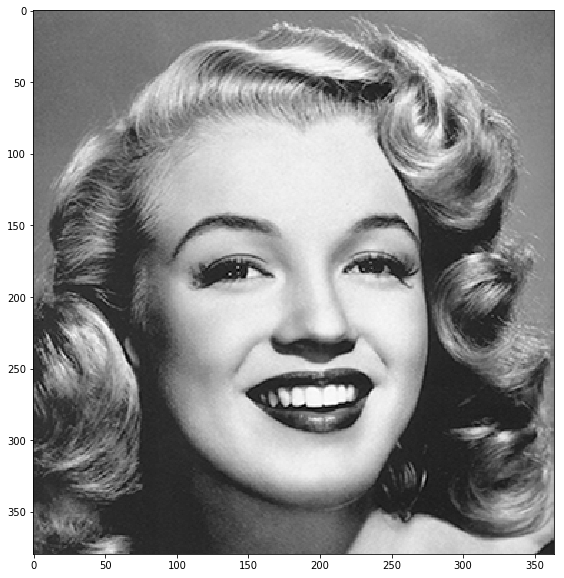

In [8]:
im = np.mean(imread('marilyn.png'), axis=2) 
plt.figure(figsize=(10,10))
plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

## Gaussian kernel

In [14]:
kernel = np.outer(signal.gaussian(im.shape[0], 4), signal.gaussian(im.shape[1], 4))
freq = fp.fft2(im)
assert(freq.shape == kernel.shape) #check the condition
freq_kernel = fp.fft2(fp.ifftshift(kernel)) #why inverse?
convolved = freq*freq_kernel
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + freq)).astype(int), cmap=plt.get_cmap('gray'))

## Inverse fourier transform

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


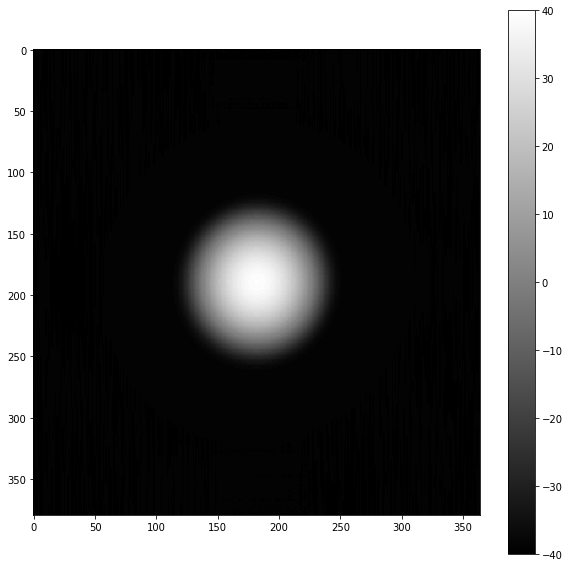

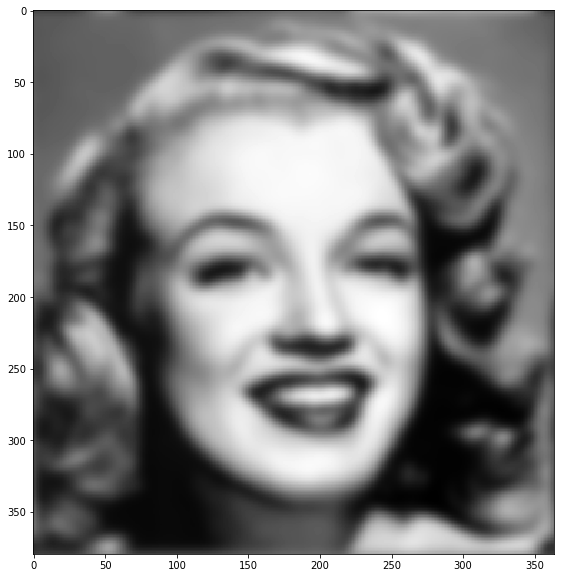

In [4]:
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur)
 
# center the frequency response
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.01 + fp.fftshift(freq_kernel))).astype(int), cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()
 
plt.figure(figsize=(10,10))
plt.imshow(im_blur, cmap=plt.get_cmap('gray'))
plt.show()

# High Pass Filter

## Load image

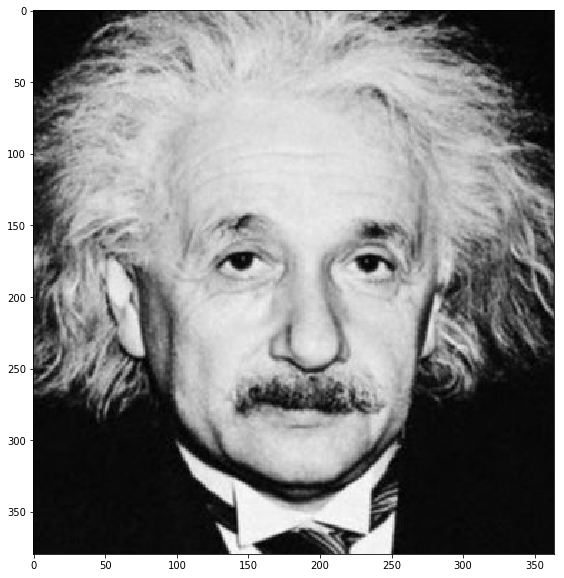

In [6]:
img = np.mean(imread('einstein.png'), axis=2) 
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

## Fourier tranform

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


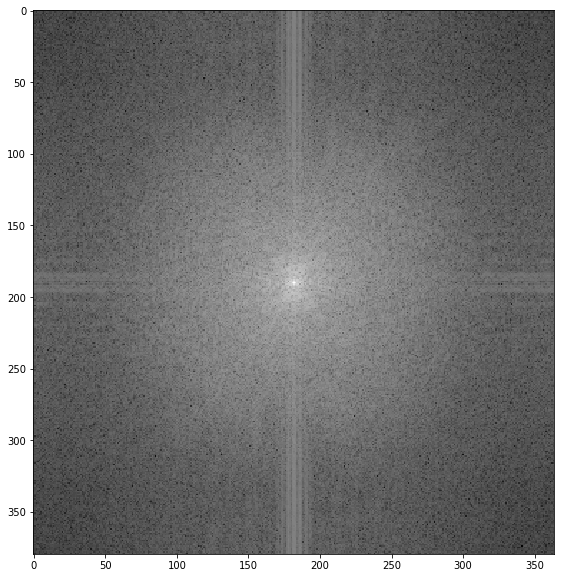

In [7]:
F1 = fp.fft2((img).astype(float))
F2 = fp.fftshift(F1)
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.get_cmap('gray'))
plt.show()

## Block low frequencies

(380, 364)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


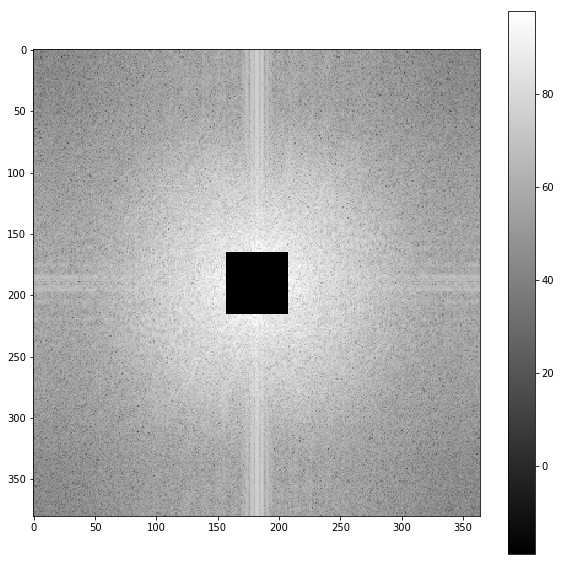

In [8]:
(w, h) = img.shape
half_w, half_h = int(w/2), int(h/2)
n = 25
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0
print(img.shape)
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

## Inverse fourier transform

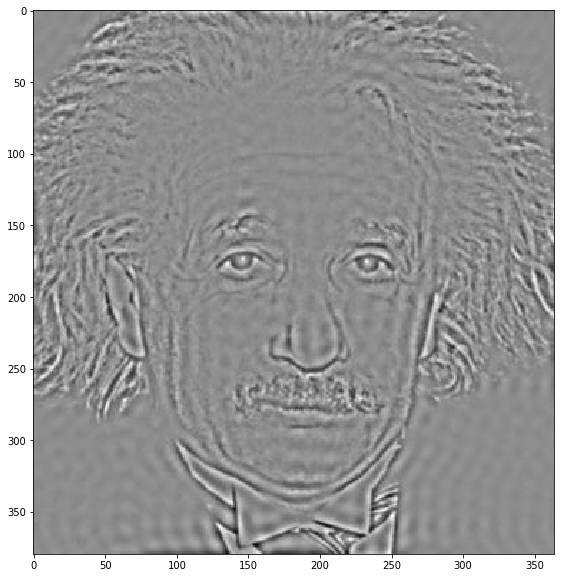

In [9]:
im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.show()

# Hybird Image

In [4]:
Hybrid=im1+im_blur
plt.figure(figsize=(10,10))
#print(Hybrid)
plt.imshow(Hybrid,cmap=plt.get_cmap('gray'))

NameError: name 'im1' is not defined